In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

In [3]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

<IPython.core.display.Javascript object>


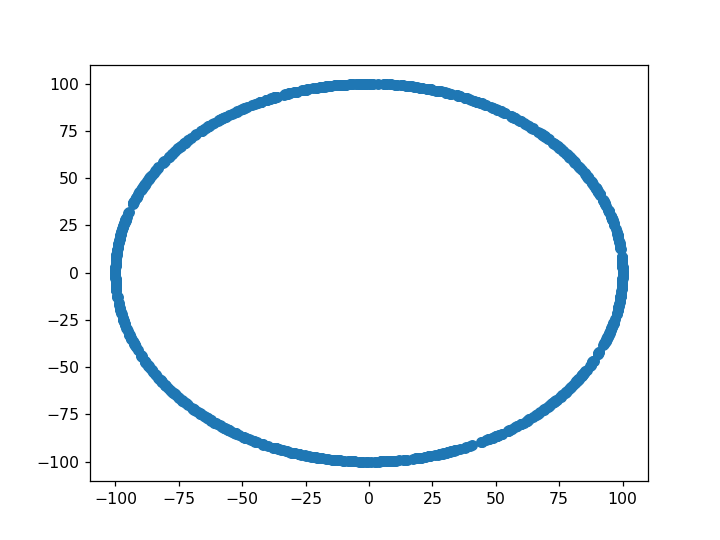

In [4]:
%matplotlib notebook
import random
import math
points = []
punkty = []
for i in range(1000):
    p = random.uniform(0, 2*math.pi)
    points.append((100*math.cos(p), 100*math.sin(p)))
punkty1 = (PointsCollection(points))
plot = Plot([punkty1])
plot.draw()

<IPython.core.display.Javascript object>


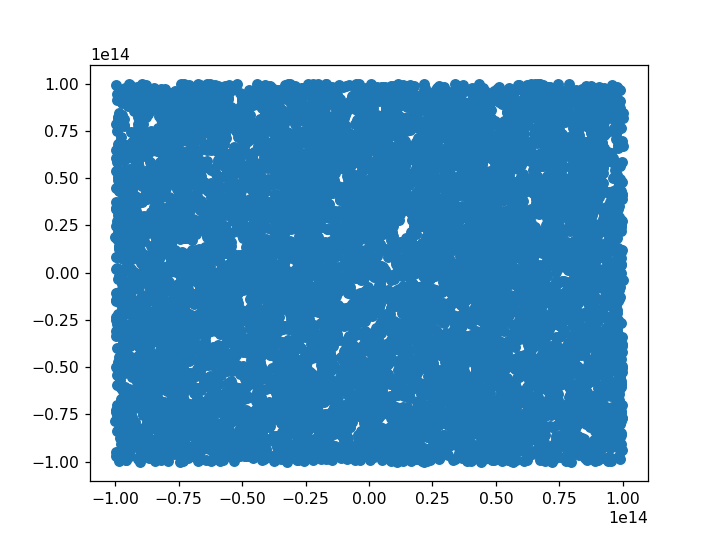

In [5]:
%matplotlib notebook
import random
import math
points = []
for i in range(10000):
    points.append((random.uniform(-1e14, 1e14), random.uniform(-1e14, 1e14)))
punkty2 = (PointsCollection(points))
plot = (Plot([punkty2]))
plot.draw()

<IPython.core.display.Javascript object>


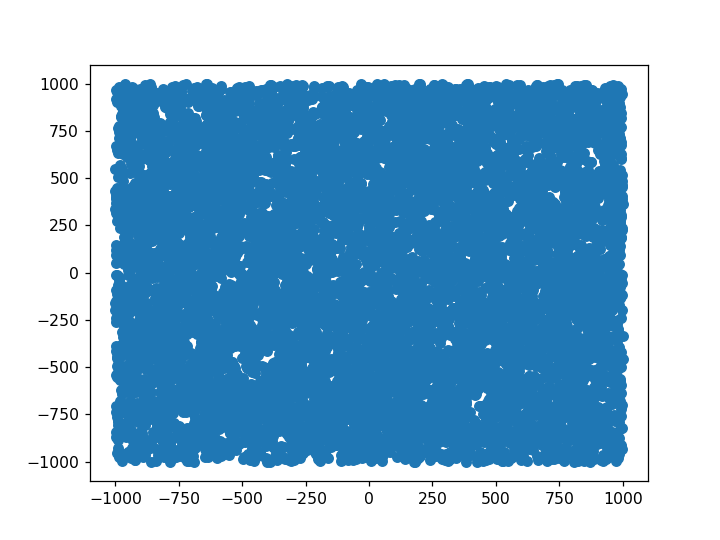

In [6]:
%matplotlib notebook
import random
import math
points = []
for i in range(10000):
    points.append((random.uniform(-1000, 1000), random.uniform(-1000, 1000)))
punkty3 = (PointsCollection(points))
plot = Plot([punkty3])
plot.draw()

<IPython.core.display.Javascript object>


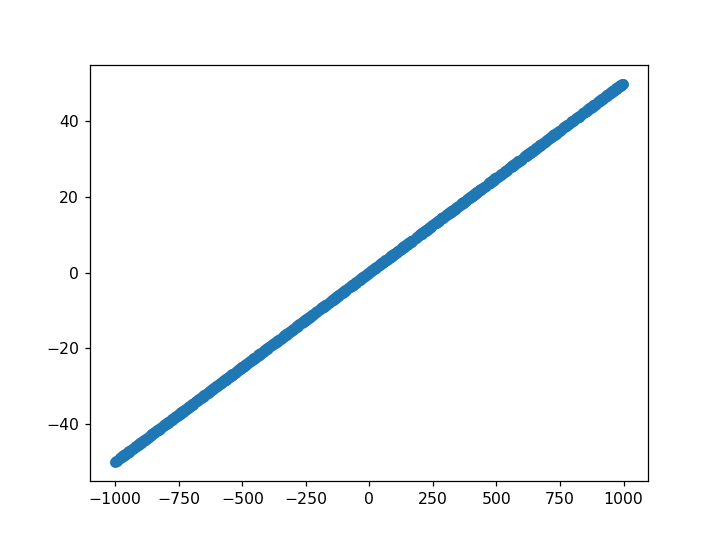

In [7]:
%matplotlib notebook
import random
import math
points = []
for i in range(1000):
    t = random.uniform(-1000, 1000)
    points.append((t, t/20+0.05))
punkty4 = PointsCollection(points)
plot = (Plot([punkty4]))
plot.draw()

In [15]:
%matplotlib notebook
import random
import math

In [16]:
%matplotlib notebook
a = (-1.0, 0.0)
b = (1.0, 0.1)
precision = 0.000000000000000000001

def det1(a, b, c, precision):
    det = (a[0] * b[1]) + (b[0] * c[1]) + (c[0] * a[1]) - (b[1] * c[0]) - (c[1] * a[0]) - (a[1] * b[0])
    if(abs(det) < precision): return 0
    if(det > 0): return 1
    if(det < 0): return -1
def det2(a, b, c, precision):
    det = (a[0]-c[0]) * (b[1]-c[1]) - (a[1] - c[1]) * (b[0] - c[0])
    if(abs(det) < precision): return 0
    if(det > 0): return 1
    if(det < 0): return -1



In [17]:
def podzial(a, b, pointsList, precision):
    position1 = []
    position2 = []
    for i in range(len(pointsList.points)):
        position1.append(det1(a, b, pointsList.points[i], precision))
        position2.append(det2(a, b, pointsList.points[i], precision))
    compare = []
    licznik = 0
    for i in range(len(position1)):
        if(position1[i] != position2[i]):
            licznik = licznik +1
            compare.append((pointsList.points[i][0], pointsList.points[i][1]))
    return (compare, licznik)








        

0.0 %  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon = 1e-21


<IPython.core.display.Javascript object>


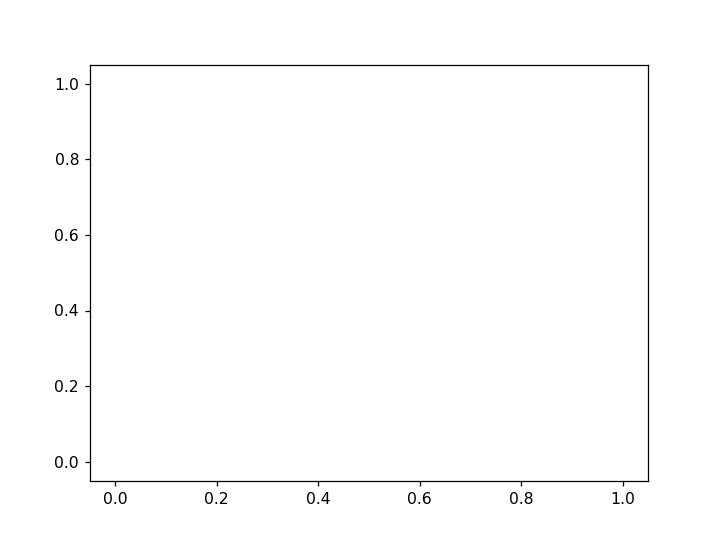

In [72]:
resultPunkty1 = podzial(a, b, punkty1, precision)
punktyRozne = (PointsCollection(resultPunkty1[0]))

print(resultPunkty1[1]/len(punkty1.points) *100,"%  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon =", precision)

plot = Plot([punktyRozne])
plot.draw()

0.0 %  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon = 1e-21


<IPython.core.display.Javascript object>


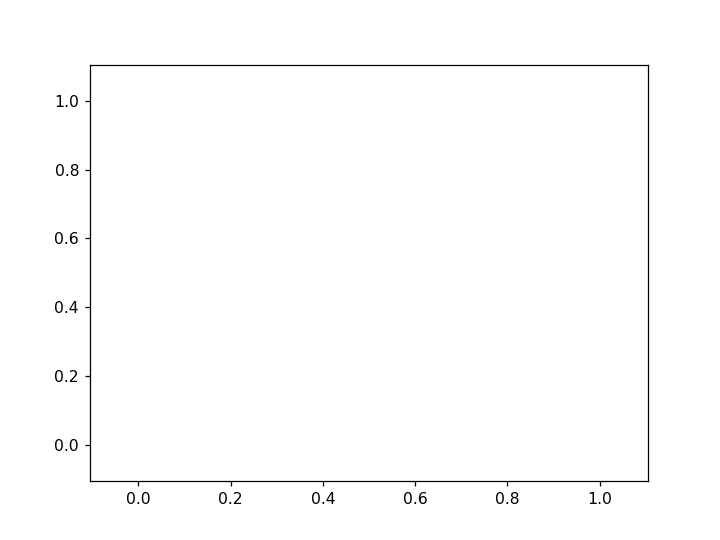

In [11]:
resultPunkty2 = podzial(a, b, punkty2, precision)
punktyRozne = (PointsCollection(resultPunkty2[0]))

print(resultPunkty2[1]/len(punkty2.points) *100,"%  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon =", precision)

plot = Plot([punktyRozne])
plot.draw()

In [12]:
resultPunkty3 = podzial(a, b, punkty3, precision)
punktyRozne = (PointsCollection(resultPunkty3[0]))

print(resultPunkty3[1]/len(punkty3.points) *100,"%  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon =", precision)

plot = Plot([punktyRozne])
plot.draw()

0.0 %  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon = 1e-21


C:\Users\mstac\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


69.1 %  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon = 1e-14


<IPython.core.display.Javascript object>


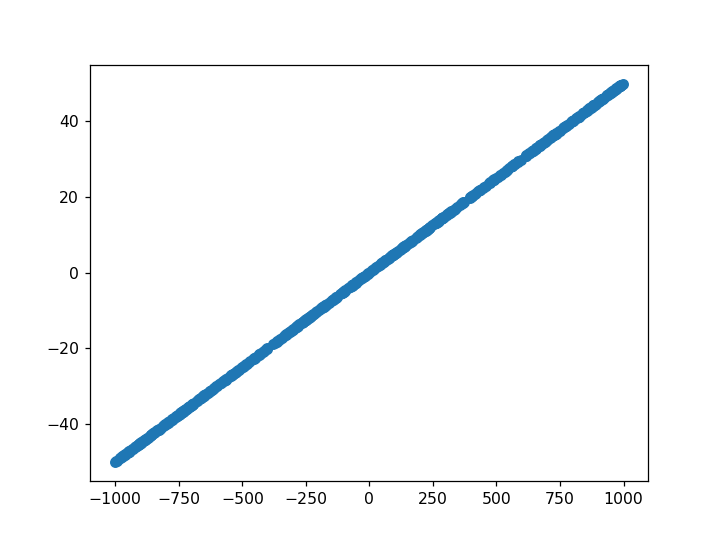

In [18]:
resultPunkty4 = podzial(a, b, punkty4, precision)
punktyRozne = (PointsCollection(resultPunkty4[0]))

print(resultPunkty4[1]/len(punkty4.points)*100,"%  punktow zostalo zakwalifikowanych nieprawidlowo przy epsilon =", 1e-14)

plot = Plot([punktyRozne])
plot.draw()

In [14]:
precision = 1
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
print("\n")
precision = 0.0001
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
print("\n")
precision = 1e-10
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
print("\n")
precision = 1e-15
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
print("\n")
precision = 1e-36
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
print("\n")
precision = 1e-100
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])
precision = 0
print("\n")
print("punkty1: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty1, precision)[1])
print("punkty2: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty2, precision)[1])
print("punkty3: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty3, precision)[1])
print("punkty4: ilosc roznic dla epsilon =", precision, "wynosi", podzial(a, b, punkty4, precision)[1])



punkty1: ilosc roznic dla epsilon = 1 wynosi 0
punkty2: ilosc roznic dla epsilon = 1 wynosi 0
punkty3: ilosc roznic dla epsilon = 1 wynosi 0
punkty4: ilosc roznic dla epsilon = 1 wynosi 0


punkty1: ilosc roznic dla epsilon = 0.0001 wynosi 0
punkty2: ilosc roznic dla epsilon = 0.0001 wynosi 0
punkty3: ilosc roznic dla epsilon = 0.0001 wynosi 0
punkty4: ilosc roznic dla epsilon = 0.0001 wynosi 0


punkty1: ilosc roznic dla epsilon = 1e-10 wynosi 0
punkty2: ilosc roznic dla epsilon = 1e-10 wynosi 0
punkty3: ilosc roznic dla epsilon = 1e-10 wynosi 0
punkty4: ilosc roznic dla epsilon = 1e-10 wynosi 0


punkty1: ilosc roznic dla epsilon = 1e-15 wynosi 0
punkty2: ilosc roznic dla epsilon = 1e-15 wynosi 0
punkty3: ilosc roznic dla epsilon = 1e-15 wynosi 0
punkty4: ilosc roznic dla epsilon = 1e-15 wynosi 661


punkty1: ilosc roznic dla epsilon = 1e-36 wynosi 0
punkty2: ilosc roznic dla epsilon = 1e-36 wynosi 0
punkty3: ilosc roznic dla epsilon = 1e-36 wynosi 0
punkty4: ilosc roznic dla epsilon